In [3]:
import pandas as pd

# txt file upload
url = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/image_attribute_labels.txt'
imgatt = pd.read_csv(url,sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False, usecols=[0,1,2],
                     names=['imgid','attid','present'])

In [4]:
imgatt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [5]:
imgatt.shape

(3677856, 3)

In [6]:
imgatt2 = imgatt.pivot(index='imgid', columns='attid',values='present')

In [9]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [8]:
imgatt2.shape

(11788, 312)

In [11]:
secondUrl = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/image_class_labels.txt'
imglabels = pd.read_csv(secondUrl, sep=' ', header=None,names=['imgid','label'])
imglabels = imglabels.set_index('imgid')

In [12]:
imglabels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

In [13]:
imglabels.shape

(11788, 1)

In [14]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [15]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [17]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
5951     0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
5007     0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
8300     0    1    0    0    0    0    0    0    0    0  ...    0    0    1   
2228     0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
1203     0    0    0    0    1    0    0    0    0    0  ...    0    0    0   

       306  307  308  309  310  311  312  
imgid                                     
5951     0    0    0    1    0    0    0  
5007     0    0    1    0    0    0    1  
8300     0    0    0    1    0    0    0  
2228     0    0    0    0    0    0    1  
1203     0    0    0    0    1    0    0  

[5 rows x 312 columns]

In [18]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state = 0, n_estimators=100)

In [20]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [21]:
print(clf.predict(df_train_att.head()))

[102  86 142  39  22]


In [22]:
clf.score(df_test_att,df_test_label)

0.4479936642027455

In [25]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [26]:
cm

array([[ 3,  2,  1, ...,  0,  0,  0],
       [ 0, 16,  0, ...,  0,  0,  0],
       [ 2,  1,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  2,  8,  0],
       [ 0,  0,  0, ...,  0,  0, 12]], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
thirdUrl = 'https://raw.githubusercontent.com/Soohwan-Lee/hcmld21/main/Datasets/CUB_200_2011/classes.txt'
birds = pd.read_csv(thirdUrl, sep='\s+', header = None, usecols=[1], names = ['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [31]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalized confusion matrix
[[0.17 0.11 0.06 ... 0.   0.   0.  ]
 [0.   0.7  0.   ... 0.   0.   0.  ]
 [0.1  0.05 0.38 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.08 0.   0.  ]
 [0.   0.   0.   ... 0.14 0.57 0.  ]
 [0.   0.   0.   ... 0.   0.   0.8 ]]


In [32]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att,df_train_label)
clftree.score(df_test_att, df_test_label)

0.26108764519535377

In [33]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.48125659978880675

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.44 (+/- 0.02)


In [37]:
scorestree = corss_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std()*2))

NameError: name 'corss_val_score' is not defined

In [36]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std()*2))

Accuracy: 0.47 (+/- 0.03)


In [38]:
max_features_opts = range(5,50,5)
n_estimators_opts = range(10,200,20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4),float)
i=0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] =scores.std() * 2
        i += 1
        print("Max Features: %d, numestimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
             (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max Features: 5, numestimators: 10, accuracy: 0.26 (+/- 0.02)
Max Features: 5, numestimators: 30, accuracy: 0.35 (+/- 0.02)
Max Features: 5, numestimators: 50, accuracy: 0.39 (+/- 0.02)
Max Features: 5, numestimators: 70, accuracy: 0.41 (+/- 0.02)
Max Features: 5, numestimators: 90, accuracy: 0.42 (+/- 0.02)
Max Features: 5, numestimators: 110, accuracy: 0.43 (+/- 0.02)
Max Features: 5, numestimators: 130, accuracy: 0.43 (+/- 0.01)
Max Features: 5, numestimators: 150, accuracy: 0.43 (+/- 0.02)
Max Features: 5, numestimators: 170, accuracy: 0.44 (+/- 0.01)
Max Features: 5, numestimators: 190, accuracy: 0.45 (+/- 0.02)
Max Features: 10, numestimators: 10, accuracy: 0.29 (+/- 0.01)
Max Features: 10, numestimators: 30, accuracy: 0.38 (+/- 0.01)
Max Features: 10, numestimators: 50, accuracy: 0.40 (+/- 0.01)
Max Features: 10, numestimators: 70, accuracy: 0.42 (+/- 0.02)
Max Features: 10, numestimators: 90, accuracy: 0.43 (+/- 0.01)
Max Features: 10, numestimators: 110, accuracy: 0.44 (+/- 0.

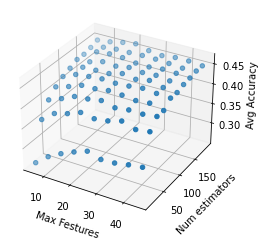

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Max Festures')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg Accuracy')
plt.show()